## Importing libraries

In [47]:
import pandas as pd
import numpy as np
import statsmodels as sm
import pylab as pl
from scipy import stats
from sklearn import preprocessing
from sklearn import cluster, tree, decomposition
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pydot
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
plt.style.use('ggplot')

In [48]:
file_name="https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/travel.csv"
travel=pd.read_csv(file_name)

In [49]:
travel.head(3)

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,0,1,8286,1,0,1,0,63,1258,68
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,0,1,1842,3,0,1,2,198,786,37
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,0,1,8746,1,0,1,6,105,29,22


# Dataset Description of fields
![alt text](https://miro.medium.com/max/704/1*qx6uN9Zr1Y2BVtm_yCAv5Q.png)

In [50]:
# Get base information on our dataset
print("Rows     : ", travel.shape[0])
print ("Columns  : " , travel.shape[1])
print ("\nFeatures : \n" ,travel.columns.tolist())
print ("\nMissing values :  ", travel.isnull().sum().values.sum())


Rows     :  100000
Columns  :  25

Features : 
 ['Unnamed: 0', 'date_time', 'site_name', 'posa_continent', 'user_location_country', 'user_location_region', 'user_location_city', 'orig_destination_distance', 'user_id', 'is_mobile', 'is_package', 'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster']

Missing values :   36329


In [51]:
# Get statistics for our Numerical Columns
travel.describe()

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,63915.000000,1.000000e+05,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.882530e+07,9.838570,2.678150,85.995070,308.636990,27676.391240,1960.661721,6.054383e+05,0.133770,0.248140,...,0.336750,1.111750,14426.32738,2.577290,0.079930,1.487980,3.150920,81.093290,598.848330,49.860370
std,1.086183e+07,11.996426,0.749018,59.292002,208.706581,16768.647409,2228.153377,3.516154e+05,0.340407,0.431936,...,0.734449,0.451602,11036.98122,2.149263,0.271186,1.280262,1.620534,56.111519,510.959297,28.885423
min,1.012000e+03,2.000000,0.000000,0.000000,0.000000,0.000000,0.005600,1.400000e+01,0.000000,0.000000,...,0.000000,0.000000,4.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.448967e+06,2.000000,3.000000,66.000000,174.000000,12949.000000,312.792100,2.987962e+05,0.000000,0.000000,...,0.000000,1.000000,8267.00000,1.000000,0.000000,1.000000,2.000000,50.000000,158.000000,25.000000
50%,1.881212e+07,2.000000,3.000000,66.000000,314.000000,27655.000000,1131.835300,6.028825e+05,0.000000,0.000000,...,0.000000,1.000000,9145.00000,1.000000,0.000000,1.000000,2.000000,50.000000,591.000000,49.000000
75%,2.825307e+07,15.000000,3.000000,70.000000,385.000000,42328.000000,2542.359350,9.157222e+05,0.000000,0.000000,...,0.000000,1.000000,18784.00000,5.000000,0.000000,2.000000,4.000000,106.000000,701.000000,73.000000
max,3.767009e+07,53.000000,4.000000,239.000000,1025.000000,56507.000000,11965.376100,1.198783e+06,1.000000,1.000000,...,9.000000,8.000000,65035.00000,9.000000,1.000000,120.000000,6.000000,212.000000,2117.000000,99.000000


In [52]:
#Find where missing values are located
travel.isnull().sum()

Unnamed: 0                       0
date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    36085
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_ci                        122
srch_co                        122
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E508F668C8>,
      dtype=object)

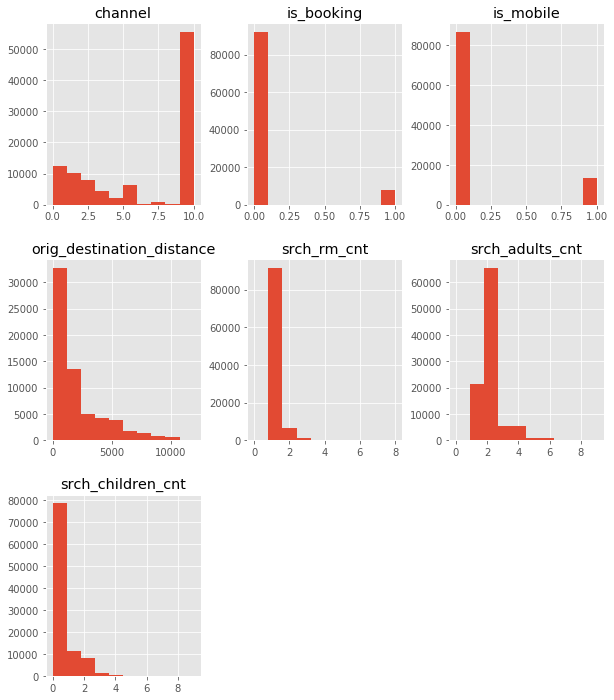

In [53]:
# Plot some of the data
travel[['channel', 'is_booking', 'is_mobile', 'orig_destination_distance', 'srch_rm_cnt', 'srch_adults_cnt', 'srch_children_cnt']].hist(figsize=(10, 12))

In [54]:
# View bookings made per user
booking_count_per_user=travel.groupby("user_id")["is_booking"].agg(['count']).reset_index()
booking_count_per_user.head()

,user_id,count
0,14,1
1,38,1
2,40,1
3,156,2
4,160,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E503409508>]],
      dtype=object)

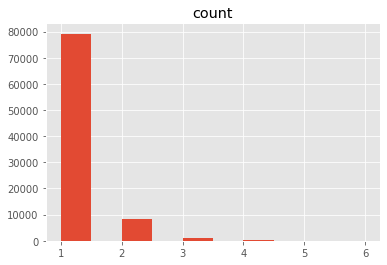

In [55]:
booking_count_per_user[['count']].hist(figsize=(6, 4))

In [56]:
# distribution of number of booking attempts
travel.groupby('user_id')['is_booking'].agg(num_of_booking_attempts='count').reset_index().groupby('num_of_booking_attempts')['user_id'].agg('count')

num_of_booking_attempts
1    79189
2     8423
3     1065
4      161
5       24
6        1
Name: user_id, dtype: int64

In [57]:
# distribution of number of booking attempts
travel.groupby('user_id')['is_booking'].agg(num_of_bookings='sum').reset_index().groupby('num_of_bookings')['user_id'].agg('count')

num_of_bookings
0    80991
1     7753
2      117
3        2
Name: user_id, dtype: int64

## Logic checks

In [58]:
pd.crosstab(travel["srch_adults_cnt"], travel["srch_children_cnt"])

srch_children_cnt,0,1,2,3,4,5,6,7,8,9
srch_adults_cnt,,,,,,,,,,
0,174,2,3,2,0,0,0,0,0,0
1,18749,2137,523,117,11,1,9,1,2,0
2,50736,7093,6529,972,208,14,7,1,0,0
3,3645,1131,469,131,27,5,2,2,0,2
4,3933,690,494,77,83,9,4,0,0,0
5,535,131,41,20,6,4,2,0,0,0
6,669,73,53,28,18,13,7,0,0,0
7,99,20,5,8,6,3,0,0,0,0
8,183,12,13,2,6,1,3,2,2,1


In [59]:
# travel.drop(travel[travel["srch_adults_cnt"]+travel["srch_children_cnt"]==0].index).describe()
travel.drop(travel[travel["srch_adults_cnt"]+travel["srch_children_cnt"]==0].index, inplace=True)
travel.describe()

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,9.982600e+04,99826.000000,99826.000000,99826.000000,99826.000000,99826.000000,63800.000000,9.982600e+04,99826.000000,99826.000000,...,99826.000000,99826.000000,99826.000000,99826.000000,99826.000000,99826.000000,99826.000000,99826.000000,99826.000000,99826.000000
mean,1.882778e+07,9.837147,2.678360,85.996524,308.575101,27672.791477,1959.922567,6.054342e+05,0.133763,0.246850,...,0.337337,1.111905,14430.614329,2.578467,0.079949,1.487749,3.149801,81.107016,598.891141,49.858364
std,1.086095e+07,11.994507,0.748765,59.299506,208.723143,16769.257097,2228.800100,3.516431e+05,0.340399,0.431181,...,0.734954,0.451914,11039.901710,2.149676,0.271216,1.279821,1.620078,56.114464,510.868287,28.889892
min,1.012000e+03,2.000000,0.000000,0.000000,0.000000,0.000000,0.005600,1.400000e+01,0.000000,0.000000,...,0.000000,1.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.450324e+06,2.000000,3.000000,66.000000,174.000000,12937.000000,311.901850,2.987725e+05,0.000000,0.000000,...,0.000000,1.000000,8267.000000,1.000000,0.000000,1.000000,2.000000,50.000000,158.000000,25.000000
50%,1.881744e+07,2.000000,3.000000,66.000000,314.000000,27651.500000,1130.000850,6.028735e+05,0.000000,0.000000,...,0.000000,1.000000,9147.000000,1.000000,0.000000,1.000000,2.000000,50.000000,591.000000,49.000000
75%,2.825404e+07,15.000000,3.000000,70.000000,385.000000,42328.000000,2542.103975,9.158898e+05,0.000000,0.000000,...,0.000000,1.000000,18787.000000,5.000000,0.000000,2.000000,4.000000,106.000000,701.000000,73.000000
max,3.767009e+07,53.000000,4.000000,239.000000,1025.000000,56507.000000,11965.376100,1.198783e+06,1.000000,1.000000,...,9.000000,8.000000,65035.000000,9.000000,1.000000,120.000000,6.000000,212.000000,2117.000000,99.000000


In [60]:
# Changing the column type to datetime using pandas
travel["srch_co"]=pd.to_datetime(travel["srch_co"])
travel["srch_ci"]=pd.to_datetime(travel["srch_ci"])
travel["date_time"]=pd.to_datetime(travel["date_time"])

# Change the timestamp of 'date_time' (2014-11-03 16:02:28) to simply "2014-11-03"
travel["date"]=pd.to_datetime(travel["date_time"].apply(lambda x: x.date()))
travel[["date", "srch_ci", "srch_co"]].head()

,date,srch_ci,srch_co
0,2014-11-03,2014-12-15,2014-12-19
1,2013-03-13,2013-03-13,2013-03-14
2,2014-10-13,2015-04-03,2015-04-10
3,2013-11-05,2013-11-07,2013-11-08
4,2014-06-10,2014-08-03,2014-08-08


In [278]:
# Check-out date need to be later than check-in date;
# Check-in date need to be later than booking date
travel[travel['srch_co'] < travel['srch_ci']][['srch_co', 'srch_ci']]
travel[travel['srch_ci'] < travel['date']][['srch_ci', 'date']].head()

,srch_ci,date
5809,2014-01-05,2014-01-07
12310,2014-10-13,2014-10-14
19014,2014-02-11,2014-10-09
21780,2014-03-10,2014-09-15
22573,2014-09-12,2014-12-02


In [62]:
travel.drop(travel[travel['srch_co'] < travel['srch_ci']].index, inplace=True)
# travel.drop(travel[travel['srch_ci'] < travel['date']].index, inplace=True)
travel.describe()

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,9.982400e+04,99824.000000,99824.000000,99824.000000,99824.000000,99824.000000,63800.000000,9.982400e+04,99824.000000,99824.000000,...,99824.000000,99824.000000,99824.000000,99824.000000,99824.000000,99824.000000,99824.000000,99824.000000,99824.000000,99824.000000
mean,1.882766e+07,9.836733,2.678384,85.997526,308.570734,27672.781445,1959.922567,6.054362e+05,0.133755,0.246844,...,0.337344,1.111907,14430.818811,2.578498,0.079951,1.487758,3.149814,81.106628,598.881421,49.858842
std,1.086103e+07,11.994236,0.748751,59.299494,208.711965,16769.185612,2228.800100,3.516396e+05,0.340391,0.431178,...,0.734960,0.451919,11039.902947,2.149686,0.271218,1.279832,1.620090,56.114504,510.865621,28.889984
min,1.012000e+03,2.000000,0.000000,0.000000,0.000000,0.000000,0.005600,1.400000e+01,0.000000,0.000000,...,0.000000,1.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.450116e+06,2.000000,3.000000,66.000000,174.000000,12937.000000,311.901850,2.987735e+05,0.000000,0.000000,...,0.000000,1.000000,8267.000000,1.000000,0.000000,1.000000,2.000000,50.000000,158.000000,25.000000
50%,1.881685e+07,2.000000,3.000000,66.000000,314.000000,27651.500000,1130.000850,6.028735e+05,0.000000,0.000000,...,0.000000,1.000000,9147.000000,1.000000,0.000000,1.000000,2.000000,50.000000,591.000000,49.000000
75%,2.825456e+07,15.000000,3.000000,70.000000,385.000000,42328.000000,2542.103975,9.158872e+05,0.000000,0.000000,...,0.000000,1.000000,18787.000000,5.000000,0.000000,2.000000,4.000000,106.000000,701.000000,73.000000
max,3.767009e+07,53.000000,4.000000,239.000000,1025.000000,56507.000000,11965.376100,1.198783e+06,1.000000,1.000000,...,9.000000,8.000000,65035.000000,9.000000,1.000000,120.000000,6.000000,212.000000,2117.000000,99.000000


# Feature Engineering

In [63]:
travel[travel.srch_co.isnull() == True][['date', 'srch_ci', 'srch_co']]
travel.drop(travel[travel.srch_ci.isnull() == True].index, inplace=True)

In [64]:
def duration(row):
    '''Gives the duration of trip by taking the row as an input and finding the time (in days) beween checkin and checkout'''
    delta = (row['srch_co'] - row['srch_ci'])/np.timedelta64(1, 'D')
    if delta < 0:
        return np.nan
    else:
        return delta

def days_in_advance(row):
    '''Gives the days the trip was booked in advance'''
    delta = (row['srch_ci'] - row['date'])/np.timedelta64(1, 'D')
    if delta < 0:
        return np.nan
    else:
        return delta

# Duration is finds the length of stay by substracting the checkout day from the checkin day
travel['duration'] = travel.apply(duration, axis=1)

# Shows how long in advance the booking was made. Done by substracting the checkin date from the booking date
travel['days_in_advance'] = travel.apply(days_in_advance, axis=1)

In [65]:
travel[['date', 'srch_ci', 'srch_co', 'duration', 'days_in_advance']].head()

,date,srch_ci,srch_co,duration,days_in_advance
0,2014-11-03,2014-12-15,2014-12-19,4.0,42.0
1,2013-03-13,2013-03-13,2013-03-14,1.0,0.0
2,2014-10-13,2015-04-03,2015-04-10,7.0,172.0
3,2013-11-05,2013-11-07,2013-11-08,1.0,2.0
4,2014-06-10,2014-08-03,2014-08-08,5.0,54.0


In [66]:
travel[travel.duration.isnull()][['date', 'srch_ci', 'srch_co', 'duration', 'days_in_advance']]

,date,srch_ci,srch_co,duration,days_in_advance


## Clustering

In [118]:
# Our selected features
features_to_explore = ['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile',
            'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'posa_continent', 'srch_rm_cnt']

hotel_market_data = travel.dropna(axis=0)[features_to_explore + ['hotel_market']]
hotel_market_groups = hotel_market_data.groupby('hotel_market').mean().reset_index().dropna(axis=0)


In [119]:
hotel_market_groups_std = hotel_market_groups.copy()
hotel_market_groups_std.head()


,hotel_market,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,posa_continent,srch_rm_cnt
0,0,3.500000,33.500000,5540.314200,0.000000,0.000000,1.500000,0.000000,3.000000,1.000000
1,1,1.000000,22.000000,4498.914300,0.000000,1.000000,2.000000,0.000000,3.000000,1.000000
2,2,3.698113,78.412736,3851.449489,0.101415,0.306604,2.066038,0.297170,2.507075,1.120283
3,3,2.250000,168.500000,3412.202700,0.000000,0.000000,1.750000,0.000000,2.500000,1.000000
4,4,3.577381,65.404762,2889.940503,0.053571,0.250000,1.952381,0.220238,2.160714,1.125000


### K-means

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1040: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  "KMeans is known to have a memory leak on Windows "


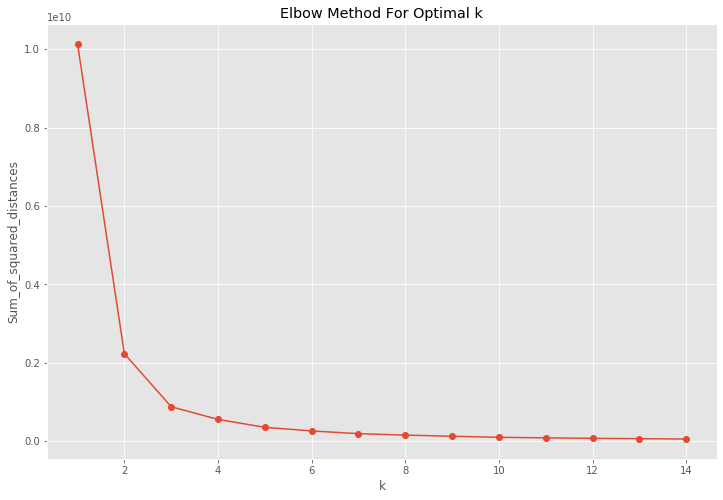

In [120]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []

# Use k from 1 to 15
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, max_iter=300, random_state=None)
    km = km.fit(hotel_market_groups_std[features_to_explore])
    # Get sum of square distances by applying km.inertia_ 
    Sum_of_squared_distances.append(km.inertia_)
# Plot Results
plt.figure(figsize=(12, 8))    

plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


For n_clusters=2, The Silhouette Coefficient is 0.7150347493937682
For n_clusters=3, The Silhouette Coefficient is 0.7097631610654592
For n_clusters=4, The Silhouette Coefficient is 0.675871065789348
For n_clusters=5, The Silhouette Coefficient is 0.6593769907959135
For n_clusters=6, The Silhouette Coefficient is 0.630421858335198
For n_clusters=7, The Silhouette Coefficient is 0.593191609792595
For n_clusters=8, The Silhouette Coefficient is 0.5917587760727605
For n_clusters=9, The Silhouette Coefficient is 0.5452170121354813
For n_clusters=10, The Silhouette Coefficient is 0.5484862524160372


Text(0, 0.5, 'Silhouette score')

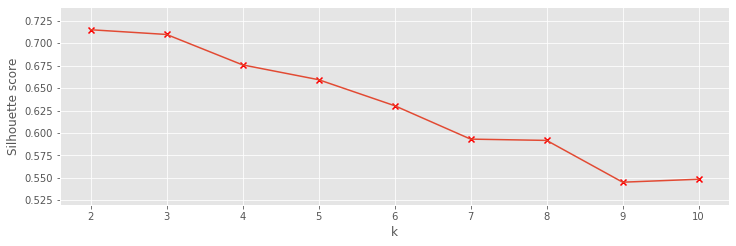

In [121]:
silhouettes = []
ks = list(range(2, 11))
for n_cluster in ks:
    kmeans = KMeans(n_clusters=n_cluster).fit(hotel_market_groups_std[features_to_explore])
    label = kmeans.labels_
    sil_coeff = silhouette_score(hotel_market_groups_std[features_to_explore], label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    silhouettes.append(sil_coeff)

plt.figure(figsize=(12, 8))    
plt.subplot(211)
plt.scatter(ks, silhouettes, marker='x', c='r')
plt.plot(ks, silhouettes)
plt.xlabel('k')
plt.ylabel('Silhouette score')


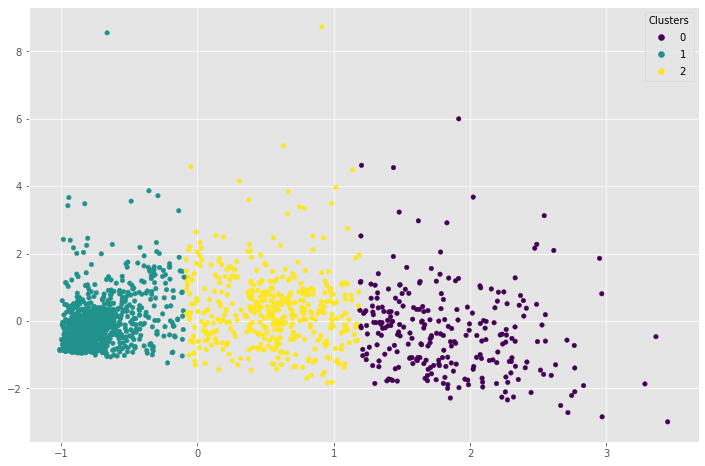

In [122]:
km = cluster.KMeans(n_clusters=3, max_iter=300, random_state=None)
hotel_market_groups_std['cluster'] = km.fit_predict(hotel_market_groups_std[features_to_explore])

# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)

hotel_market_groups_std['x'] = pca.fit_transform(hotel_market_groups_std[features_to_explore])[:, 0]
hotel_market_groups_std['y'] = pca.fit_transform(hotel_market_groups_std[features_to_explore])[:, 1]


fig,ax = plt.subplots(figsize=(12,8))
scatter = ax.scatter(hotel_market_groups_std['x'], hotel_market_groups_std['y'], c=hotel_market_groups_std['cluster'],s=20)
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
plt.show()


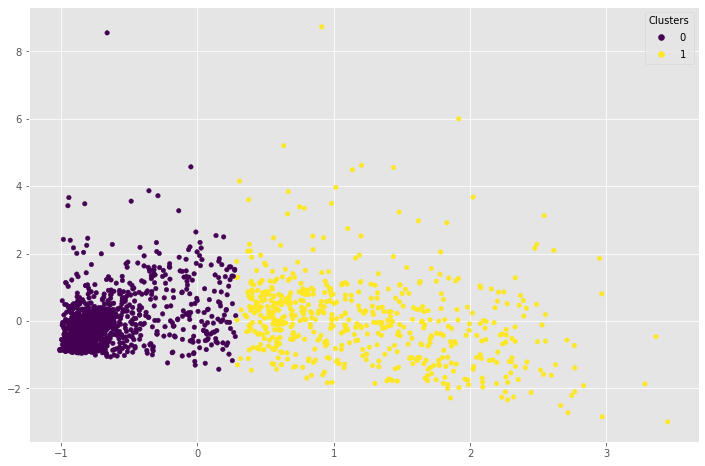

In [123]:
#Let's try it now with 2 clusters

km = cluster.KMeans(n_clusters=2, max_iter=300, random_state=None)
hotel_market_groups_std['cluster'] = km.fit_predict(hotel_market_groups_std[features_to_explore])

# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)
hotel_market_groups_std['x'] = pca.fit_transform(hotel_market_groups_std[features_to_explore])[:, 0]
hotel_market_groups_std['y'] = pca.fit_transform(hotel_market_groups_std[features_to_explore])[:, 1]

fig,ax = plt.subplots(figsize=(12,8))
scatter = ax.scatter(hotel_market_groups_std['x'], hotel_market_groups_std['y'], c=hotel_market_groups_std['cluster'],s=20)
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
plt.show()


I would say k=2 gives best seperation but the k=3 is also can be used

## GMM implementation

In [73]:
from sklearn.mixture import GaussianMixture


In [127]:
hotel_market_groups_std_gmm = hotel_market_groups.copy()
hotel_market_groups_std_gmm.head()

,hotel_market,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,posa_continent,srch_rm_cnt
0,0,3.500000,33.500000,5540.314200,0.000000,0.000000,1.500000,0.000000,3.000000,1.000000
1,1,1.000000,22.000000,4498.914300,0.000000,1.000000,2.000000,0.000000,3.000000,1.000000
2,2,3.698113,78.412736,3851.449489,0.101415,0.306604,2.066038,0.297170,2.507075,1.120283
3,3,2.250000,168.500000,3412.202700,0.000000,0.000000,1.750000,0.000000,2.500000,1.000000
4,4,3.577381,65.404762,2889.940503,0.053571,0.250000,1.952381,0.220238,2.160714,1.125000


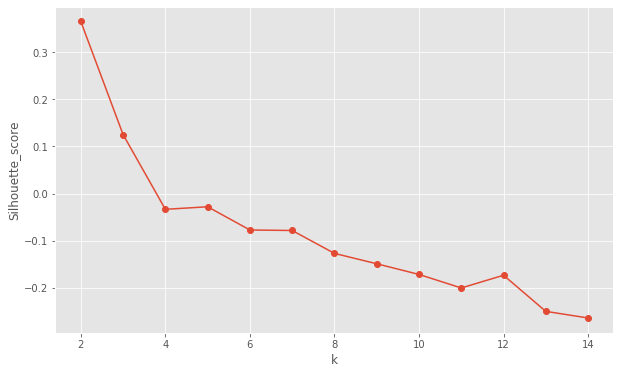

In [192]:
features_to_explore_gmm = ['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile',
            'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'posa_continent', 'srch_rm_cnt']

score = []

# Use k from 1 to 15
K = range(2,15)
for k in K:
    gmm = GaussianMixture(n_components=k)

    gmm.fit(hotel_market_groups_std_gmm[features_to_explore_gmm])
    pred = gmm.predict(hotel_market_groups_std_gmm[features_to_explore_gmm])
    # Get sum of square distances by applying km.inertia_ 
    score.append(silhouette_score(hotel_market_groups_std_gmm,pred))

# Plot Results
plt.figure(figsize=(10, 6))    
plt.plot(K, score, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette_score')
plt.show()

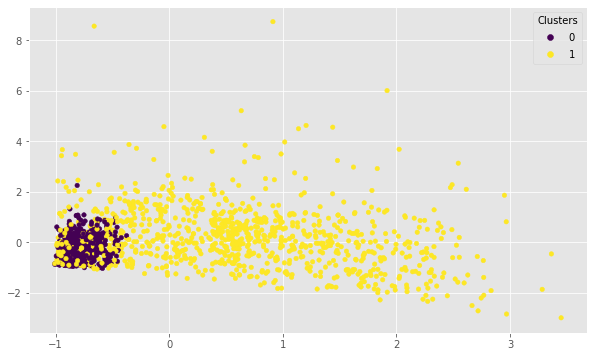

In [193]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
gmm.fit(hotel_market_groups_std_gmm[features_to_explore_gmm])

#predictions from gmm
labels = gmm.predict(hotel_market_groups_std_gmm[features_to_explore_gmm])
frame = pd.DataFrame(hotel_market_groups_std_gmm[features_to_explore_gmm])
frame['cluster'] = labels

pca = decomposition.PCA(n_components=2, whiten=True)
frame['x'] = pca.fit_transform(frame[features_to_explore_gmm])[:, 0]
frame['y'] = pca.fit_transform(frame[features_to_explore_gmm])[:, 1]

fig,ax = plt.subplots(figsize=(10,6))
scatter = ax.scatter(frame['x'], frame['y'], c=frame['cluster'],s=20)
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
plt.show()

In [130]:
# We will merge the two dataframes based on a common column user_location_city
hotel_market_groups.merge(hotel_market_groups_std[['hotel_market', 'cluster']]).groupby('cluster').mean() # for every column


,hotel_market,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,posa_continent,srch_rm_cnt
cluster,,,,,,,,,,
0,940.414234,2.505607,33.838564,903.365529,0.133842,0.111476,1.972073,0.349026,2.820542,1.116309
1,1042.607945,3.387235,66.404946,5472.324810,0.073411,0.151846,1.969828,0.215472,2.822196,1.102462


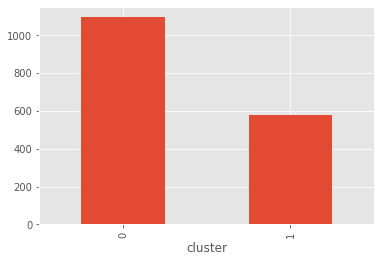

In [131]:
# Plot our Cluster Counts
hotel_market_groups_std.groupby('cluster')['hotel_market'].agg('count').plot(kind='bar')


## B) Same implementations for "srch_destination_id" column

The most important point is section will be determining the columns to explore. Instead of visualizing, I carefully analyzed the descriptions of columns and tried to choose best features to do the clustering for "srch_destination_id", where we try to seperate customers based on their location of booking.

In [260]:
features_to_explore_2 = ['posa_continent',
'orig_destination_distance', 'hotel_continent']

In [261]:
srch_destination_id_data = travel.dropna(axis=0)[features_to_explore_2 + ['srch_destination_id']]
srch_destination_id_groups = srch_destination_id_data.groupby('srch_destination_id').mean().reset_index().dropna(axis=0)

In [267]:
srch_destination_id_groups_std = srch_destination_id_groups.copy()
cols2 = [
'orig_destination_distance', 'hotel_continent']

srch_destination_id_groups_std[cols2] = preprocessing.scale(srch_destination_id_groups_std[cols2])

srch_destination_id_groups_std.head()

,srch_destination_id,posa_continent,orig_destination_distance,hotel_continent
0,4,1.0,-0.421288,1.802114
1,8,3.0,-0.675484,-0.608660
2,11,3.0,-0.355053,-0.608660
3,14,3.0,2.457653,1.199421
4,16,3.0,-0.628823,-0.608660


## Clustering

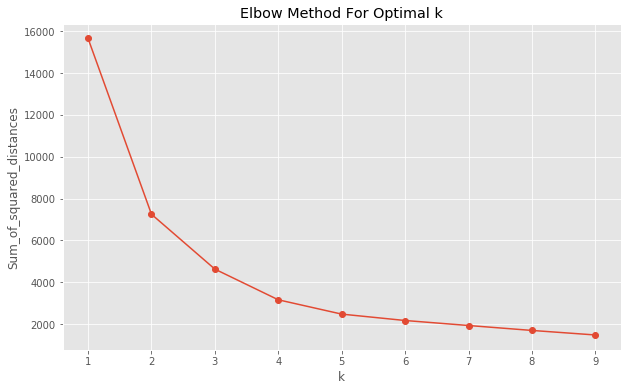

In [268]:
Sum_of_squared_distances = []

# Use k from 1 to 15
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=300, random_state=None)
    km = km.fit(srch_destination_id_groups_std[features_to_explore_2])
    # Get sum of square distances by applying km.inertia_ 
    Sum_of_squared_distances.append(km.inertia_)

# Plot Results
plt.figure(figsize=(10, 6))    
plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

For n_clusters=2, The Silhouette Coefficient is 0.6282679480132112
For n_clusters=3, The Silhouette Coefficient is 0.6580054532908568
For n_clusters=4, The Silhouette Coefficient is 0.690818962464239
For n_clusters=5, The Silhouette Coefficient is 0.6670505619120743
For n_clusters=6, The Silhouette Coefficient is 0.675001609877357
For n_clusters=7, The Silhouette Coefficient is 0.6839317313893055
For n_clusters=8, The Silhouette Coefficient is 0.6914306227619403
For n_clusters=9, The Silhouette Coefficient is 0.6996300930736709
For n_clusters=10, The Silhouette Coefficient is 0.5846767802400826


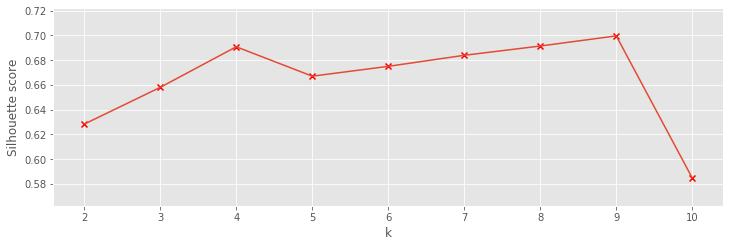

In [277]:
silhouettes = []
ks = list(range(2, 11))
for n_cluster in ks:
    kmeans = KMeans(n_clusters=n_cluster).fit(srch_destination_id_groups_std[features_to_explore_2])
    label = kmeans.labels_
    sil_coeff = silhouette_score(srch_destination_id_groups_std[features_to_explore_2], label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    silhouettes.append(sil_coeff)

plt.figure(figsize=(12, 8))    
plt.subplot(211)
plt.scatter(ks, silhouettes, marker='x', c='r')
plt.plot(ks, silhouettes)
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

In [275]:
km = cluster.KMeans(n_clusters=3, max_iter=500, random_state=None)
srch_destination_id_groups_std['cluster'] = km.fit_predict(srch_destination_id_groups_std[features_to_explore_2])

# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)
#pca.fit(city_groups[features_to_explore])
srch_destination_id_groups_std['x'] = pca.fit_transform(srch_destination_id_groups_std[features_to_explore_2])[:, 0]
srch_destination_id_groups_std['y'] = pca.fit_transform(srch_destination_id_groups_std[features_to_explore_2])[:, 1]

#### One of main reasons to choose 3 features was to to directly plot and observe them in 3d without dimensiality reduction:

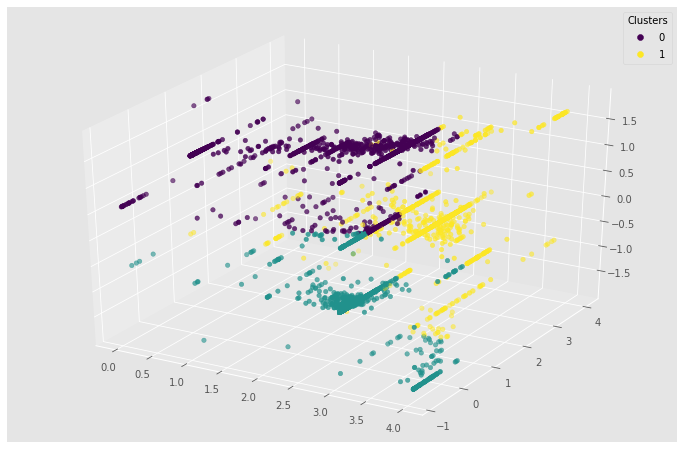

In [276]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=((12,8)))
ax = fig.add_subplot(111, projection='3d')
x = np.array(srch_destination_id_groups_std['posa_continent'])
y = np.array(srch_destination_id_groups_std['orig_destination_distance'])
z = np.array(srch_destination_id_groups_std['hotel_continent'])
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")

ax.scatter(x,y,z, marker="o", c=srch_destination_id_groups_std["cluster"], s=20)
plt.show()

Unless the seperation plot seems a bit weird due to less number of features, the scores for seperation is satisfactory

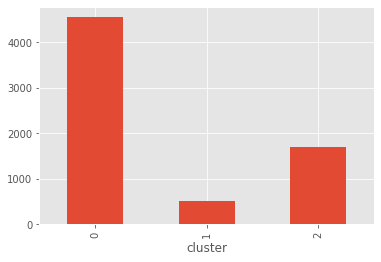

In [225]:
srch_destination_id_groups.merge(srch_destination_id_groups_std[['srch_destination_id', 'cluster']]).groupby('cluster').mean() # for every column
srch_destination_id_groups_std.groupby('cluster')['srch_destination_id'].agg('count').plot(kind='bar')


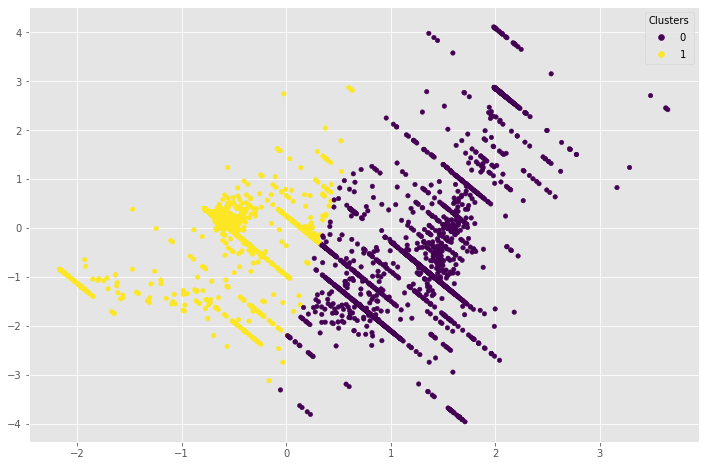

In [226]:
# 2 clusters 

km = cluster.KMeans(n_clusters=2, max_iter=300, random_state=None)
srch_destination_id_groups_std['cluster'] = km.fit_predict(srch_destination_id_groups_std[features_to_explore_2])

# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)
#pca.fit(city_groups[features_to_explore])
srch_destination_id_groups_std['x'] = pca.fit_transform(srch_destination_id_groups_std[features_to_explore_2])[:, 0]
srch_destination_id_groups_std['y'] = pca.fit_transform(srch_destination_id_groups_std[features_to_explore_2])[:, 1]


fig,ax = plt.subplots(figsize=(12,8))
scatter = ax.scatter(srch_destination_id_groups_std['x'], srch_destination_id_groups_std['y'], c=srch_destination_id_groups_std['cluster'],s=20)
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
plt.show()


## GMM implementation for srch_destination_id grouping

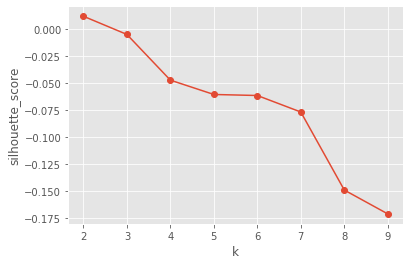

In [228]:
silhouette_scores = []

K = range(2,10)
for k in K:
    gmm = GaussianMixture(n_components=k)
    gmm.fit(srch_destination_id_groups_std[features_to_explore_2])
    pred = gmm.predict(srch_destination_id_groups_std[features_to_explore_2])
    silhouette_scores.append(silhouette_score(srch_destination_id_groups_std,pred))

# Plot Results
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.show()

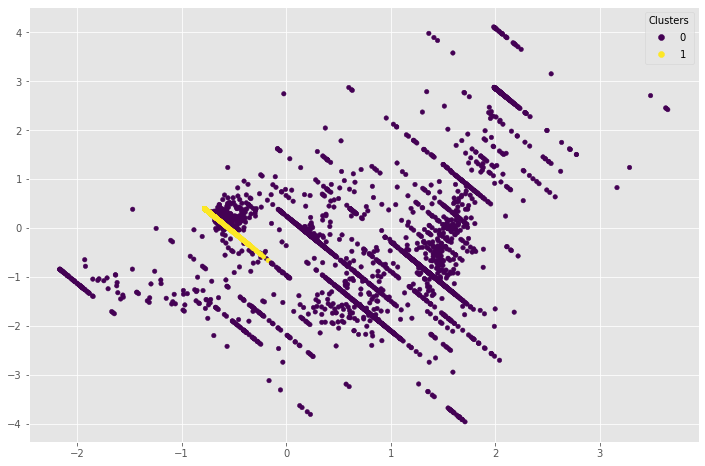

In [213]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
gmm.fit(srch_destination_id_groups_std[features_to_explore_2])

#predictions from gmm
labels = gmm.predict(srch_destination_id_groups_std[features_to_explore_2])
frame = pd.DataFrame(srch_destination_id_groups_std[features_to_explore_2])
frame['cluster'] = labels

pca = decomposition.PCA(n_components=2, whiten=True)
frame['x'] = pca.fit_transform(frame[features_to_explore_2])[:, 0]
frame['y'] = pca.fit_transform(frame[features_to_explore_2])[:, 1]

fig,ax = plt.subplots(figsize=(12,8))
scatter = ax.scatter(frame['x'], frame['y'], c=frame['cluster'],s=20)
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
plt.show()

Dissimilarly, probabilistic nature of Gaussian Mixture Model did not perform well with the choosen parameters. 